# Implementing LSTM Model- Part of B.E Final Year Project

## Initials

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/PROJECT DATA_BE_FINAL YEAR_2024-25.csv')

In [ ]:
df.head()

,DAY,MONTH,YEAR,PRECIPITATION,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE,WIND SPEED,HUMIDITY,SOLAR RADIATION,MAXIMUM DEMAND (IN MW)
0,1,1,2019,0.0,22.3,5.8,9.4,70.1,160.9,4472.0
1,2,1,2019,0.0,22.7,7.9,11.2,70.6,164.5,4228.0
2,3,1,2019,0.0,19.9,7.0,21.1,83.1,166.9,4331.0
3,4,1,2019,0.0,17.7,8.0,21.5,87.3,134.3,4461.0
4,5,1,2019,0.0,20.9,7.6,21.6,78.8,165.6,4170.0


In [ ]:
df.tail()

,DAY,MONTH,YEAR,PRECIPITATION,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE,WIND SPEED,HUMIDITY,SOLAR RADIATION,MAXIMUM DEMAND (IN MW)
1790,27,12,2023,0.0,19.5,10.3,9.4,91.9,145.0,4531.0
1791,28,12,2023,0.0,19.5,9.3,9.4,91.1,146.8,4578.0
1792,29,12,2023,0.0,18.6,12.0,9.4,93.9,144.0,4884.0
1793,30,12,2023,0.0,19.4,12.8,9.4,90.0,113.7,4556.0
1794,31,12,2023,0.0,16.0,11.5,9.4,87.0,146.9,4634.0


In [ ]:
df1=df.reset_index()['MAXIMUM DEMAND (IN MW)']

In [ ]:
df1

,MAXIMUM DEMAND (IN MW)
0,4472.0
1,4228.0
2,4331.0
3,4461.0
4,4170.0
...,...
1790,4531.0
1791,4578.0
1792,4884.0
1793,4556.0


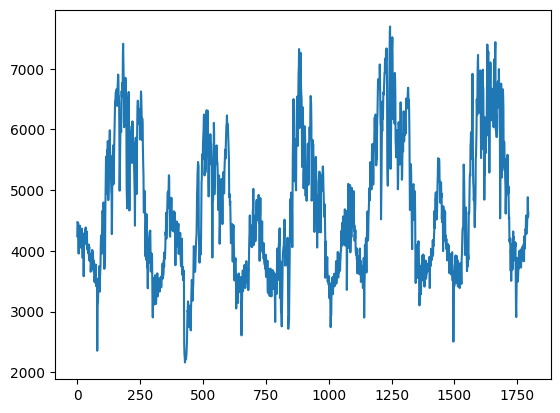

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
import numpy as np

In [ ]:
df1

,MAXIMUM DEMAND (IN MW)
0,4472.0
1,4228.0
2,4331.0
3,4461.0
4,4170.0
...,...
1790,4531.0
1791,4578.0
1792,4884.0
1793,4556.0


In [ ]:
df1
df1=np.array(df1).reshape(-1,1)
a1=int(len(df1)*0.80)
a2 =len(df1)-a1
_80,_20=df1[0:a1,:],df1[a1:len(df1),:1]

In [ ]:
_20.size

359

In [ ]:
a3 = int(len(_20)*0.80)
_20_final = _20[0:328,:]

In [ ]:
a3

287

In [ ]:
_20_final.size

328

## Scaling and Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.41738973]
 [0.37328272]
 [0.39190166]
 ...
 [0.49186551]
 [0.43257411]
 [0.4466739 ]]


In [ ]:
# Splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1436, 359)

In [ ]:
train_data

array([[0.41738973],
       [0.37328272],
       [0.39190166],
       ...,
       [0.53561099],
       [0.55748373],
       [0.60791757]])

In [ ]:
test_data

array([[0.53886479],
       [0.55151844],
       [0.60050615],
       [0.60610991],
       [0.59851772],
       [0.54501085],
       [0.54103398],
       [0.47541576],
       [0.48228489],
       [0.51301518],
       [0.5236804 ],
       [0.53633406],
       [0.49186551],
       [0.50253073],
       [0.42751265],
       [0.45462762],
       [0.41720897],
       [0.42245119],
       [0.43347795],
       [0.33152567],
       [0.46493131],
       [0.40726681],
       [0.41829356],
       [0.44649313],
       [0.45046999],
       [0.45263919],
       [0.41359364],
       [0.4477585 ],
       [0.36135213],
       [0.37852495],
       [0.3571945 ],
       [0.34960231],
       [0.36767896],
       [0.33682213],
       [0.35014461],
       [0.3038684 ],
       [0.30965293],
       [0.3302603 ],
       [0.33857556],
       [0.35249458],
       [0.32447578],
       [0.34743312],
       [0.32194505],
       [0.26644975],
       [0.28561099],
       [0.29049168],
       [0.31652205],
       [0.280

In [ ]:
import numpy
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   # i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1405, 30)
(1405,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(328, 30)
(328,)


(None, None)

In [ ]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Model Building

In [ ]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_31 (LSTM)                       │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_32 (LSTM)                       │ (None, 30, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_33 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=2,batch_size=1,verbose=1)

Epoch 1/2
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - loss: 0.0168 - val_loss: 0.0064
Epoch 2/2
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - loss: 0.0058 - val_loss: 0.0036


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
# Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

4844.288134384652

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(_20_final,test_predict))

904.3605745991265

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(_20_final,test_predict)

742.1754101264768

## Plotting

In [ ]:
# Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Seasonal Decompose

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
seasonal_decompose = seasonal_decompose(df1, period = 365)

In [ ]:
seasonal_decompose.plot()